## Extract Cases with Label

In [ ]:
import pickle
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import os
from glob import glob
from zipfile import ZipFile
from collections import Counter
import shutil

vocab = pickle.load(open('/Users/muriel820/Downloads/ml-project/finalfeature.p','rb'))
vocab = set(vocab)
for w in vocab:
    vocab.remove(w)
    vocab.add(re.sub(r'_',' ',w))
n = len(vocab)
count_vectorizer=CountVectorizer(binary=False,vocabulary = vocab,ngram_range=(1,4))

os.chdir('/Users/muriel820/Downloads/ml-project/cleaned_1880')
zipfiles = glob('*zip')

for zfname in zipfiles:        
    print(zfname)
    zfile = ZipFile(zfname)    
    year = zfname.split('/')[-1][:-4]
 
    members = zfile.namelist()        
    threshold = len(members) / 200    
    docfreqs = Counter()

    zip_name = '/Users/muriel820/Downloads/ml-project/cleaned_1880/frequency_count_by_paragraph/' + zfname[0:4]+'/'
    zip_name_2 = '/Users/muriel820/Downloads/ml-project/cleaned_1880/frequency_count_by_doc/' + zfname[0:4]+'/'
    #maj ='maj'
    os.makedirs(zip_name)
    #os.chdir(zip_name)
    os.makedirs(zip_name+'maj/')
    os.makedirs(zip_name+'con/')
    os.makedirs(zip_name+'dis/')
    os.makedirs(zip_name+'condis/')
    os.makedirs(zip_name_2)
    os.makedirs(zip_name_2+'maj/')
    os.makedirs(zip_name_2+'con/')
    os.makedirs(zip_name_2+'dis/')
    os.makedirs(zip_name_2+'condis/')
    all_ = []
    
    for fname in members:
        if fname.endswith('-maj.p'):
            docid = fname.split('/')[-1][:-2]                     
            text = pickle.load(zfile.open(fname,'r'))
            para_count = count_vectorizer.transform(text)
            name = docid + '.p'        
            pickle.dump(para_count, open(zip_name+'maj/'+name, "wb"))
            doc_count = scipy.sparse.csr_matrix((1, n))
            for i in range(para_count.shape[0]):
                doc_count = doc_count + para_count[i]
            pickle.dump(doc_count, open(zip_name_2+'maj/'+name, "wb"))
            all_.append((docid.split('-')[0],doc_count))
        
        elif fname.endswith('.p')==False:
            continue 
        elif fname.endswith('dis/.p')==True:
            continue
        else:
            optype = fname.split('-')[-1][:-2]
            docid = fname.split('/')[-1][:-2]
            text = pickle.load(zfile.open(fname,'r'))

            if len(optype) ==7:        
                para_count = count_vectorizer.transform(text)
                name = docid + '.p'        
                pickle.dump(para_count, open(zip_name+'condis/'+name, "wb"))
                doc_count = scipy.sparse.csr_matrix((1, n))
                for i in range(para_count.shape[0]):
                    doc_count = doc_count + para_count[i]
                pickle.dump(doc_count, open(zip_name_2+'condis/'+name, "wb"))
                all_.append((docid.split('-')[0],doc_count))

            elif len(optype) == 4 and optype[0] =='c':
                para_count = count_vectorizer.transform(text)
                name = docid + '.p'        
                pickle.dump(para_count, open(zip_name+'con/'+name, "wb"))
                doc_count = scipy.sparse.csr_matrix((1, n))
                for i in range(para_count.shape[0]):
                    doc_count = doc_count + para_count[i]
                pickle.dump(doc_count, open(zip_name_2+'con/'+name, "wb"))
                all_.append((docid.split('-')[0],doc_count))

            else:
                para_count = count_vectorizer.transform(text)
                name = docid + '.p'        
                pickle.dump(para_count, open(zip_name+'dis/'+name, "wb"))
                doc_count = scipy.sparse.csr_matrix((1, n))
                for i in range(para_count.shape[0]):
                    doc_count = doc_count + para_count[i]
                pickle.dump(doc_count, open(zip_name_2+'dis/'+name, "wb"))
                all_.append((docid.split('-')[0],doc_count))
    all_ = dict(all_)
    pickle.dump(all_,open('all.p', "wb"))
    shutil.make_archive(zip_name, 'zip', zip_name)
    shutil.rmtree(zip_name,ignore_errors=True, onerror=None)
    shutil.make_archive(zip_name_2, 'zip', zip_name_2)
    shutil.rmtree(zip_name_2,ignore_errors=True, onerror=None)

In [ ]:
import pickle
import re
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import os
from sklearn.utils import shuffle
from sklearn.svm import LinearSVC
from glob import glob
from zipfile import ZipFile
from collections import Counter
import shutil
import scipy
from pandas import Series

os.chdir('/home/xy990/2000')
zipfiles = glob('*zip')

total=[]
for zfname in zipfiles:
    print(zfname)
    zfile = ZipFile(zfname)
    year = zfname.split('/')[-1][:-4]
    
    members = zfile.namelist()
    threshold = len(members) / 200
    c = 0
    for fname in members: 
        if fname.endswith('.p')==False:
            continue
        elif fname.endswith('dis/.p')==True:
            continue
        else:
            docid = fname.split('/')[-1][:-2]
            caseid = docid.split('-')[0]
            para_count = pickle.load(zfile.open(fname,'r'))
            if para_count.shape[0] ==0:
                continue
            else:
                topics = cl_clf.predict(para_count)
                probability = cl_clf.predict_proba(para_count)
                for i in range(len(topics)):
                    total.append({(str(year),caseid,fname.split('/')[-1].split('-')[-1][:-2],str(i),str(topics[i])):np.asarray(probability[i])})
pickle.dump(total,open('valence_2000.p','wb'))

## Facts VS Law

### Split Facts and Store as List

In [1]:
import os
from glob import glob
from zipfile import ZipFile
from collections import Counter
import pickle
import re
import shutil

def paragraph_list(text):
    #eliminate page number in format of [*123]
    text = re.sub('[^A-Za-z]+', ' ', text)
    p = []
    para = text.split('\n')
    for i in range(len(para)):
        para[i].strip()
        if para[i]!='' or para[i]!=' ' or para[i]!='  ':
            #group incorrect breaklined back to the form of paragraphs
#             if para[i][-1]!='.' and i+1<len(para):
#                 para[i+1] = para[i] +' ' +para[i+1]
#             else:
            p.append(para[i])
    return p

os.chdir('C:/Users/Aileen/1003/appellate_facts/')
zipfiles = glob('*zip')
count = 0
final = []

for zfname in zipfiles:  #['appellate_facts.zip']
    print(zfname)
    zfile = ZipFile(zfname)    
    members = zfile.namelist()
#     os.makedirs('C:/Users/Aileen/Desktop/facts/')
#     os.chdir('C:/Users/Aileen/Desktop/facts/')

    for fname in members:
        print(fname)
        if fname.endswith('.txt'):
#             docid = fname.split('/')[-1][:-4]                     
#             text = open(pickle.load(zfile.open('C:/Users/Aileen/1003/facts_ngram/1980_12296.p','r'))
#             text = zfile.open(fname, 'r').read()
            try:
                text = zfile.open(fname).read().decode().split("\n")
            except:
                count += 1
                pass
            for t in text:
                a = paragraph_list(t)
                if a != [] and a != '' and a != ' ' and a != '\r' and a != [' '] and a != ['']:
                    final.append(a[0].strip(' '))
            
#     pickle.dump(f, open('C:/Users/Aileen/1003/facts_ngram/final_count.p', "wb"))
        
#     shutil.make_archive(zip_name, 'zip', zip_name)
#     shutil.rmtree(zip_name,ignore_errors=True, onerror=None)
final = list(set(final))

appellate_facts.zip
appellate_facts/1980_12296.txt
appellate_facts/1980_12657.txt
appellate_facts/1980_13659.txt
appellate_facts/1980_13918.txt
appellate_facts/1980_14566.txt
appellate_facts/1980_14974.txt
appellate_facts/1980_15690.txt
appellate_facts/1980_16002.txt
appellate_facts/1980_16446.txt
appellate_facts/1980_16473.txt
appellate_facts/1980_16512.txt
appellate_facts/1980_16597.txt
appellate_facts/1980_16651.txt
appellate_facts/1980_16656.txt
appellate_facts/1980_16790.txt
appellate_facts/1980_17442.txt
appellate_facts/1980_17495.txt
appellate_facts/1980_17578.txt
appellate_facts/1980_17840.txt
appellate_facts/1980_18017.txt
appellate_facts/1980_18599.txt
appellate_facts/1980_18614.txt
appellate_facts/1980_18665.txt
appellate_facts/1980_19512.txt
appellate_facts/1980_19916.txt
appellate_facts/1980_20288.txt
appellate_facts/1980_20438.txt
appellate_facts/1980_21339.txt
appellate_facts/1980_21359.txt
appellate_facts/1980_21368.txt
appellate_facts/1980_21515.txt
appellate_facts/198

In [2]:
len(final)

1722

### Pick 27 Law Cases each year from 1980-1985

In [3]:
import os
import random
import pickle
# from collections import Counter

law = []
num = 0
for year in range(1980, 1986, 1):
#     print("year", year)
    directory = "C:/Users/Aileen/Desktop/cleaned/" + str(year) + "/"
    for i in range(27):
        num += 1
        fname = random.choice(os.listdir(directory))
#         print(fname)
        file = pickle.load(open(directory + fname,'rb'))
        for para in file:
            a = paragraph_list(para)
            if a != [] and a != '' and a != ' ' and a != '\r' and a != [' '] and a != ['']:
                law.append(a[0].strip(' '))
law = list(set(law))

In [4]:
len(law)

3351

### Combine into Datasets

In [5]:
import pandas as pd
label = [1] * len(final) + [0] * len(law)
X = final + law
data = pd.DataFrame({'text': X, 'label': label})

In [6]:
len(data)

5073

In [7]:
data.head()

,label,text
0,1,Early in Munroe contacted Fordees president an...
1,1,The Guarantors contend that the original guara...
2,1,Stokely engages in the harvesting processing a...
3,1,Opinion I F Supp at citation omitted
4,1,MANAGEMENT PREROGATIVES


In [8]:
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.utils import shuffle

data = shuffle(data)
X = data['text']
Y = data['label']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = .75)

C:\Users\Aileen\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

binary_vectorizer = CountVectorizer(stop_words = "english", ngram_range=(1, 3), max_df=1.0, min_df=1, binary = True)
binary_vectorizer.fit(X_train)
X_train_binary = binary_vectorizer.transform(X_train)
X_test_binary = binary_vectorizer.transform(X_test)

# tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
#                                  min_df=0.2, stop_words='english',
#                                  use_idf=True, ngram_range=(1,3))

# tfidf_vectorizer = TfidfVectorizer(stop_words = "english", use_idf=True, ngram_range=(1,3))
# tfidf_vectorizer.fit(X_train)
# X_train_tfidf = tfidf_vectorizer.transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)

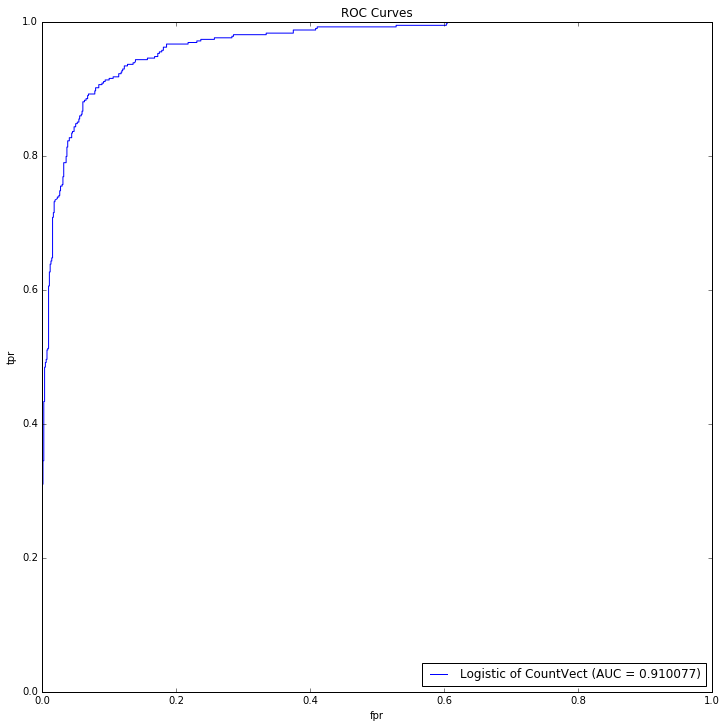

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.multiclass import OneVsRestClassifier
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 12, 12

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics

model1 = LogisticRegression()
model1.fit(X_train_binary, Y_train)
auc1 = metrics.roc_auc_score(Y_test, model1.predict(X_test_binary))
fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, model1.predict_proba(X_test_binary)[:,1])

# model2 = BernoulliNB()
# model2.fit(X_train_binary, Y_train)
# auc2 = metrics.roc_auc_score(Y_test, model2.predict(X_test_binary))
# fpr2, tpr2, thresholds2 = metrics.roc_curve(Y_test, model2.predict_proba(X_test_binary)[:,1])

# model3 = LogisticRegression()
# model3.fit(X_train_tfidf, Y_train)
# auc3 = metrics.roc_auc_score(Y_test, model3.predict(X_test_tfidf))
# fpr3, tpr3, thresholds3 = metrics.roc_curve(Y_test, model3.predict_proba(X_test_tfidf)[:,1])

# model4 = BernoulliNB()
# model4.fit(X_train_tfidf, Y_train)
# auc4 = metrics.roc_auc_score(Y_test, model4.predict(X_test_tfidf))
# fpr4, tpr4, thresholds4 = metrics.roc_curve(Y_test, model4.predict_proba(X_test_tfidf)[:,1])

ax = plt.subplot()
plt.plot(fpr1, tpr1, label = 'Logistic of CountVect' + ' (AUC = %f)' % auc1)
# plt.plot(fpr2, tpr2, label = 'Naive_Bayes of CountVect' + ' (AUC = %f)' % auc2)
# plt.plot(fpr3, tpr3, label = 'Logistic of TFIDF' + ' (AUC = %f)' % auc3)
# plt.plot(fpr4, tpr4, label = 'Naive_Bayes of TFIDF' + ' (AUC = %f)' % auc4)

plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC Curves")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc = 4)
plt.show()

In [120]:
# from sklearn.grid_search import GridSearchCV
from sklearn.model_selection import GridSearchCV
import nltk
# model1 = LogisticRegression()
# model1.fit(X_train_binary, Y_train)
# auc1 = metrics.roc_auc_score(Y_test, model1.predict(X_test_binary))
# fpr1, tpr1, thresholds1 = metrics.roc_curve(Y_test, model1.predict_proba(X_test_binary)[:,1])
# model1.score(X_test_binary, Y_test)
    
param_grid_lr_scale = {'C':[10**i for i in range(-3, 3)], 'penalty':['l1', 'l2']}
lr_grid_search_scaler = GridSearchCV(LogisticRegression(), param_grid_lr_scale)
lr_grid_search_scaler.fit(X_train_binary, Y_train)
lr_best2 = lr_grid_search_scaler.best_estimator_
lr_best2.fit(X_train_binary, Y_train)
lr_best2.score(X_test_binary, Y_test)

0.73394495412844041

In [116]:
lr_best2

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
filename = 'C:/Users/Aileen/Desktop/fact_mod.p'
pickle.dump(model1, open(filename, 'wb'), protocol = 2)

In [30]:
pickle.dump(binary_vectorizer.vocabulary_,open("C:/Users/Aileen/Desktop/fact_fea.p","wb"), protocol = 2)

In [44]:
pickle.load(open('C:/Users/Aileen/2008_results.p','rb'), encoding ='latin-1')[-30:-20]

[('X344PH1', 'maj', 0.66856048525119394),
 ('X34GVH1', 'maj', 0.69146892808312332),
 ('X34H011', 'maj', 0.66546582423218481),
 ('X34H0H1', 'maj', 0.63618092119381142),
 ('X34RJH1', 'maj', 0.66986098160658036),
 ('X35UR11', 'maj', 0.6638157411218647),
 ('X37O611', 'maj', 0.68151118282595791),
 ('X37O6H1', 'maj', 0.67949711902078236),
 ('X37REH1', 'maj', 0.69287778669460764),
 ('X37RF11', 'maj', 0.66199426388497851)]

### Extracting n-grams

In [40]:
from numpy import prod
from collections import Counter
from nltk import sent_tokenize,ngrams,PorterStemmer,SnowballStemmer,WordNetLemmatizer
from nltk.tag import perceptron
from nltk.corpus import stopwords
import os
from glob import glob
from zipfile import ZipFile
from collections import Counter
import pickle
import re
import shutil
tagger = perceptron.PerceptronTagger()
porter = PorterStemmer()
snowball = SnowballStemmer('english')
lemmatizer = WordNetLemmatizer()

def word_normalize(word,stemmer=None):
    w = word.lower()
    if stemmer == 'porter':
        w = porter.stem(w)
    elif stemmer == 'snowball':
        w = snowball.stem(w)
    elif stemmer == 'lemma':
        w = lemmatizer.lemmatize(w)
    return w
    
# Normalize Penn tags
tagdict = {'NN':'N',
            'NNS':'N',
            'NNP':'N',
            'NNPS':'N',
            'JJ':'A',
            'JJR':'A',
            'JJS':'A',
            'VBG':'A',
            'RB':'A', # adverbs treated as adjectives
            'DT':'D',
            'IN':'P',
            'TO':'P',
            'VB':'V',
            'VBD':'V',
            'VBN':'V',
            'VBP':'V',
            'VBZ':'V',
            
            'MD': 'V', # modals treated as verbs
            'RP': 'V', # particles treated as verbs
            'CC': 'C'}

# Allowed sequences of tag patterns (from Ash 2016)
tagpatterns = {'A','N','J',
           'AN','NN', 'VN', 'VV', 'NV',
            'VP',                                    
            'NNN','AAN','ANN','NAN','NPN',
            'VAN','VNN', 'AVN', 'VVN',
            'VPN','ANV','NVV','VDN', 'VVV', 'NNV',
            'VVP','VAV','VVN',
            'NCN','VCV', 'ACA',  
            'PAN',
            'NCVN','ANNN','NNNN','NPNN', 'AANN' 'ANNN','ANPN','NNPN','NPAN', 
            'ACAN', 'NCNN', 'NNCN', 'ANCN', 'NCAN',
            'PDAN', 'PNPN',
            'VDNN', 'VDAN','VVDN'}

def tagsentence(sent,stemmer='snowball',vocab=None):
    # convert to one-letter tags if applicable, 
    # replace with none if word not in vocab
    # replace with none if tag not in tagdict
    tagwords = []
    for x in tagger.tag(sent):
        if (vocab is None or x[0] in vocab) and x[1] in tagdict:
            normword = word_normalize(x[0],stemmer=stemmer)
            normtag = tagdict[x[1]]
            tagwords.append((normword,normtag))
        else:
            tagwords.append(None)
    return tagwords

def gmean(phrase, termfreqs):
    """geometric mean association."""
    n = len(phrase)
    p = [termfreqs[w] for w in phrase.split('_')]
    pg = termfreqs[phrase]    
    return pg / (prod(p) ** (1/n))

def train_phraser(documents, max_phrase_length=3, stemmer=None, vocab=None,
                            min_doc_freq=None, min_gmean=None):    
    # take documents and get POS-gram dictionary
    
    numdocs = len(documents)
    if min_doc_freq is None:
        min_doc_freq = round(numdocs / 200) + 1

    docfreqs = Counter()
    termfreqs = Counter()        
    
    for document in documents:
        docgrams = set()
        # split into sentences
        sentences = sent_tokenize(document)
        for sentence in sentences:     
            # split into words and get POS tags
            words = sentence.split()
            tagwords = tagsentence(words,stemmer,vocab)        
            for n in range(1,max_phrase_length+1):            
                rawgrams = ngrams(tagwords,n)
                for rawgram in rawgrams:
                    # skip grams that have words not in vocab
                    if None in rawgram:
                        continue
                    gramtags = ''.join([x[1][0] for x in rawgram])
                    if gramtags in tagpatterns:
                         # if tag sequence is allowed, add to counter
                        gram = '_'.join([x[0] for x in rawgram])
                        termfreqs[gram] += 1
                        docgrams.add(gram)                                    
        docfreqs.update(docgrams)
        
    # filter vocabulary based on document frequency and make gram ids
    gram2id = {}
    id2gram = {}
       
    i = 0
    for (phrase,v) in docfreqs.most_common():   
        if v < min_doc_freq:
            break      
        if min_gmean is not None:
            # check geometric mean association
            n = v.count('_') + 1
            if len(n) >= 2:
                gscore = gmean(phrase,termfreqs) 
                if gscore[n] < min_gmean[n]:
                    continue
        gram2id[phrase] = i
        id2gram[i] = phrase
        i += 1
    
    return gram2id, id2gram

def apply_phraser(words, gram2id, max_phrase_length=3):
    """"apply phraser method to sentence."
         Input should be list of lower-case (stemmed) words"""
    sentlength = len(words)
    skip = 0
    new_s = []
    for i in range(sentlength):
        if skip > 0:
            skip -= 1
            continue
        if words[i] is None:
            continue
        for n in reversed(range(1,max_phrase_length+1)):
            if i+n > sentlength:
                continue
            gram = words[i:i+n]
            if None in gram:
                continue
            gram_word = '_'.join(gram)    
            if gram_word in gram2id:
                new_s.append(gram2id[gram_word])
                skip = n-1
                break
    return new_s


# In[ ]:


def case_feat_dict(case):
   
    phrase2id, id2phrase = train_phraser(case)
    case_feat =[]
    for para in case:
        para = re.sub('[^A-Za-z]+', ' ', para)
        querywords = para.split()

        resultwords  = [word for word in querywords if word.lower() not in stopwords.words('english')]
        result = ' '.join(resultwords)
        #para = [word for word in para if word not in stopwords.words('english')]
        sentences = sent_tokenize(result)
        for sentence in sentences:     
            # split into words and get POS tags
            words = [w.lower() for w in sentence.split()]
            phraseids = apply_phraser(words,phrase2id)

            feat = [id2phrase[p] for p in phraseids]
            feat = Counter(feat)
            case_feat.append(feat)
    return sum(case_feat, Counter())

os.chdir('C:/Users/Aileen/1003/appellate_facts')
zipfiles = glob('*zip')

for zfname in zipfiles:        
    print(zfname)
    zfile = ZipFile(zfname)    
 
    members = zfile.namelist()

#     zip_name = 'C:/Users/sherryyang/Desktop/bigdata/clean_feature/' + zfname[0:4]+'/'
#     os.makedirs(zip_name)
#     os.chdir(zip_name)
#     os.makedirs(zip_name+'maj/')
#     os.makedirs(zip_name+'con/')
#     os.makedirs(zip_name+'dis/')
#     os.makedirs(zip_name+'condis/')
    final = []
    count = 0
    for fname in members:
        print(fname)
        if fname.endswith('.txt'):
            docid = fname.split('/')[-1][:-4]                     
#             text = open(pickle.load(zfile.open('C:/Users/Aileen/1003/facts_ngram/1980_12296.p','r'))
#             text = zfile.open(fname, 'r').read()
            try:
                text = zfile.open(fname).read().decode().split("\n")
            except:
                count += 1
                pass
#                 text = zfile.open(fname, "r", errors='ignore').split("\n")
#             print(text)
            d = case_feat_dict(text)
#             print(d)
            final.append(d)
#             name = docid + '.p'        
            
    f = sum(final, Counter())
#     f = Counter(x for x in f.elements() if year_count[x] >= 2)
    pickle.dump(f, open('C:/Users/Aileen/1003/facts_ngram/final_count.p', "wb"))


appellate_facts.zip
appellate_facts/1980_12296.txt
appellate_facts/1980_12657.txt
appellate_facts/1980_13659.txt
appellate_facts/1980_13918.txt
appellate_facts/1980_14566.txt
appellate_facts/1980_14974.txt
appellate_facts/1980_15690.txt
appellate_facts/1980_16002.txt
appellate_facts/1980_16446.txt
appellate_facts/1980_16473.txt
appellate_facts/1980_16512.txt
appellate_facts/1980_16597.txt
appellate_facts/1980_16651.txt
appellate_facts/1980_16656.txt
appellate_facts/1980_16790.txt
appellate_facts/1980_17442.txt
appellate_facts/1980_17495.txt
appellate_facts/1980_17578.txt
appellate_facts/1980_17840.txt
appellate_facts/1980_18017.txt
appellate_facts/1980_18599.txt
appellate_facts/1980_18614.txt
appellate_facts/1980_18665.txt
appellate_facts/1980_19512.txt
appellate_facts/1980_19916.txt
appellate_facts/1980_20288.txt
appellate_facts/1980_20438.txt
appellate_facts/1980_21339.txt
appellate_facts/1980_21359.txt
appellate_facts/1980_21368.txt
appellate_facts/1980_21515.txt
appellate_facts/198

In [54]:
len(members) - 2

162

In [3]:
162 / 6

27.0

In [1]:
import pickle
final_facts = pickle.load(open('C:/Users/Aileen/1003/facts_ngram/final_count.p','rb'))
final_facts.most_common()

[('union', 553),
 ('employees', 405),
 ('footnotes', 331),
 ('company', 278),
 ('board', 226),
 ('end', 183),
 ('also', 178),
 ('time', 170),
 ('election', 134),
 ('order', 127),
 ('section', 123),
 ('act', 118),
 ('local', 118),
 ('october', 104),
 ('alj', 98),
 ('may', 94),
 ('court', 93),
 ('work', 93),
 ('agreement', 91),
 ('november', 87),
 ('decision', 85),
 ('district_court', 78),
 ('employer', 76),
 ('members', 76),
 ('december', 76),
 ('nlrb', 76),
 ('property', 75),
 ('employee', 75),
 ('hospital', 73),
 ('contract', 73),
 ('september', 73),
 ('hearing', 71),
 ('case', 71),
 ('march', 64),
 ('national_labor_relations', 64),
 ('july', 64),
 ('august', 61),
 ('june', 61),
 ('plant', 60),
 ('years', 59),
 ('april', 59),
 ('first', 58),
 ('letter', 56),
 ('february', 56),
 ('part', 55),
 ('following', 55),
 ('business', 55),
 ('see', 55),
 ('income', 55),
 ('description', 55),
 ('amount', 54),
 ('approximately', 53),
 ('action', 53),
 ('complaint', 53),
 ('prior', 52),
 ('notice'

In [20]:
pickle.dump(each, open('C:/Users/Aileen/1003/facts_ngram/court_case_count.p', "wb"))
each.most_common()

[('court', 718),
 ('case', 671),
 ('time', 491),
 ('upon', 471),
 ('act', 469),
 ('right', 355),
 ('law', 345),
 ('contract', 330),
 ('one', 318),
 ('question', 299),
 ('section', 284),
 ('state', 280),
 ('plaintiff', 275),
 ('order', 268),
 ('judgment', 260),
 ('patent', 257),
 ('first', 257),
 ('part', 256),
 ('action', 253),
 ('vessel', 251),
 ('also', 244),
 ('suit', 230),
 ('fact', 219),
 ('payment', 189),
 ('claim', 189),
 ('bill', 188),
 ('steamer', 182),
 ('amount', 179),
 ('may', 169),
 ('sale', 168),
 ('bank', 164),
 ('master', 159),
 ('new', 158),
 ('use', 154),
 ('land', 152),
 ('interest', 146),
 ('effect', 146),
 ('subject', 140),
 ('due', 140),
 ('certain', 140),
 ('money', 136),
 ('ship', 133),
 ('firm', 132),
 ('rule', 130),
 ('well', 121),
 ('brig', 120),
 ('cannot', 119),
 ('drawbaugh', 119),
 ('thus', 119),
 ('record', 118),
 ('general', 118),
 ('far', 115),
 ('answer', 114),
 ('proof', 113),
 ('clear', 112),
 ('lien', 111),
 ('side', 110),
 ('even', 110),
 ('show',

In [21]:
import os
import random
import pickle
from collections import Counter

new = Counter()
for year in range(1980, 1986, 1):
    print("year", year)
    directory = "C:/Users/Aileen/Desktop/cleaned/" + str(year) + "/"
    for i in range(27):
        fname = random.choice(os.listdir(directory))
        print(fname)
        file = pickle.load(open(directory + fname,'rb'))
        new = sum(file, new)
new.most_common()

year 1980
X3P8MU-maj.p
XRAIRBQNB5G0-maj.p
XGFS1VQNB5G0-maj.p
XABF9H-maj.p
XGFVRBQNB5G0-maj.p
XGFTORQNB5G0-maj.p
XRAUCBQNB5G0-maj.p
X3MET0-maj.p
X3P7OJ-maj.p
X3P7PI-maj.p
XRAISRQNB5G0-maj.p
XGFSCJQNB5G0-maj.p
XABGD1-maj.p
XGFPSVQNB5G0-maj.p
XRASPBQNB5G0-maj.p
X3UDJV-maj.p
XGG3OVQNB5G0-maj.p
XRARNNQNB5G0-maj.p
XGJG1VQNB5G0-maj.p
XGGB87QNB5G0-maj.p
XRAO9FQNB5G0-maj.p
XGFR6RQNB5G0-maj.p
XRAS0FQNB5G0-maj.p
XABFP2-maj.p
X3UETF-maj.p
XGJE83QNB5G0-maj.p
XGG2JVQNB5G0-maj.p
year 1981
XGGNDFQNB5G0-maj.p
XGGNNRQNB5G0-maj.p
XGGAIRQNB5G0-maj.p
XABIRV-maj.p
XABHA3-maj.p
XRB46VQNB5G0-maj.p
X3PAFP-maj.p
XGGGR7QNB5G0-maj.p
XRB8VJQNB5G0-maj.p
X3PA7C-maj.p
XGHBKRQNB5G0-maj.p
X3PAJ0-maj.p
XRBBDBQNB5G0-maj.p
X3SDLK-maj.p
XABHOI-maj.p
X3PA37-maj.p
XGGRANQNB5G0-maj.p
XRBBC3QNB5G0-maj.p
XGGS83QNB5G0-maj.p
X3P8BH-maj.p
X3P7O4-maj.p
X3P8HC-maj.p
XABHAR-maj.p
XGGQ6VQNB5G0-maj.p
XRBD0BQNB5G0-maj.p
XRAUFVQNB5G0-maj.p
X3P977-maj.p
year 1982
XG4017QNB5G0-maj.p
XGHAP3QNB5G0-maj.p
X3PB8B-maj.p
XGHD5BQNB5G0-maj.p
X3PBO4

[('court', 710),
 ('district_court', 516),
 ('act', 504),
 ('v', 418),
 ('case', 416),
 ('section', 362),
 ('see', 348),
 ('state', 324),
 ('also', 260),
 ('rule', 247),
 ('trial', 234),
 ('time', 221),
 ('plaintiff', 220),
 ('law', 209),
 ('judgment', 204),
 ('part', 186),
 ('motion', 181),
 ('even', 175),
 ('claim', 173),
 ('action', 171),
 ('order', 169),
 ('b', 165),
 ('fact', 163),
 ('appeal', 158),
 ('record', 158),
 ('question', 153),
 ('first', 152),
 ('epa', 148),
 ('government', 146),
 ('one', 142),
 ('right', 138),
 ('board', 138),
 ('prior', 133),
 ('may', 130),
 ('interest', 121),
 ('new', 118),
 ('use', 113),
 ('review', 112),
 ('thus', 110),
 ('opinion', 108),
 ('local', 107),
 ('congress', 104),
 ('contract', 103),
 ('conduct', 99),
 ('present', 98),
 ('trial_court', 98),
 ('grand', 97),
 ('plan', 96),
 ('union', 96),
 ('award', 94),
 ('indian', 93),
 ('rather', 91),
 ('bank', 90),
 ('suit', 90),
 ('work', 88),
 ('general', 87),
 ('counsel', 87),
 ('civil', 86),
 ('stan